In [4]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [5]:
data = pd.read_excel("Folds5x2_pp.xlsx")

In [6]:
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [7]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


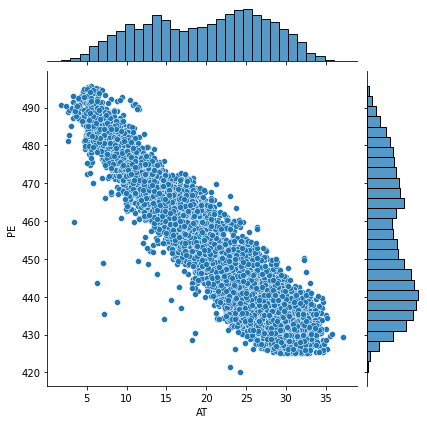

In [8]:
sns.jointplot(data["AT"],data["PE"])

In [19]:
data[["AT","PE"]]

,AT,PE
0,14.96,463.26
1,25.18,444.37
2,5.11,488.56
3,20.86,446.48
4,10.82,473.90
...,...,...
9563,16.65,460.03
9564,13.19,469.62
9565,31.32,429.57
9566,24.48,435.74


In [9]:
x = data["AT"]
y = data["PE"]

In [12]:
theta1 = (((x-x.mean()) * (y-y.mean())).sum() / ((x-x.mean()) **2).sum())
print(f"Value of Theta1 = {theta1}")

Value of Theta1 = -2.171319958517793


In [18]:
theta0 = y.mean() - (theta1 * x.mean())
print(f"Value of Theta0 = {theta0}")

Value of Theta0 = 497.0341198927677


In [20]:
# y_pred = 497.03411 - 2.171319958517793 * AT
y_pred = 497.03411 - 2.171319958517793 * (14.96)
print(f"Predicted value for PE = {y_pred}")

Predicted value for PE = 464.5511634205738


In [22]:
e1 = 463.26 - 464.5511634205738 # actual - predicted 
e1

-1.2911634205738096

In [24]:
temp = data[["AT","PE"]]
# prediction for all datapoint
y_pred = 497.03411 - 2.171319958517793 * x
temp["predicted"] = y_pred

<ipython-input-24-4369254d6ef5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["predicted"] = y_pred


In [25]:
temp

,AT,PE,predicted
0,14.96,463.26,464.551163
1,25.18,444.37,442.360273
2,5.11,488.56,485.938665
3,20.86,446.48,451.740376
4,10.82,473.90,473.540428
...,...,...,...
9563,16.65,460.03,460.881633
9564,13.19,469.62,468.394400
9565,31.32,429.57,429.028369
9566,24.48,435.74,443.880197


In [29]:
sse = ((temp["PE"] - temp["predicted"])**2).sum()
print(f"Sum of squared error = {sse}")

Sum of squared error = 281602.5248430792


C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 480, '497.03411 - 2.171319958517793 * AT')

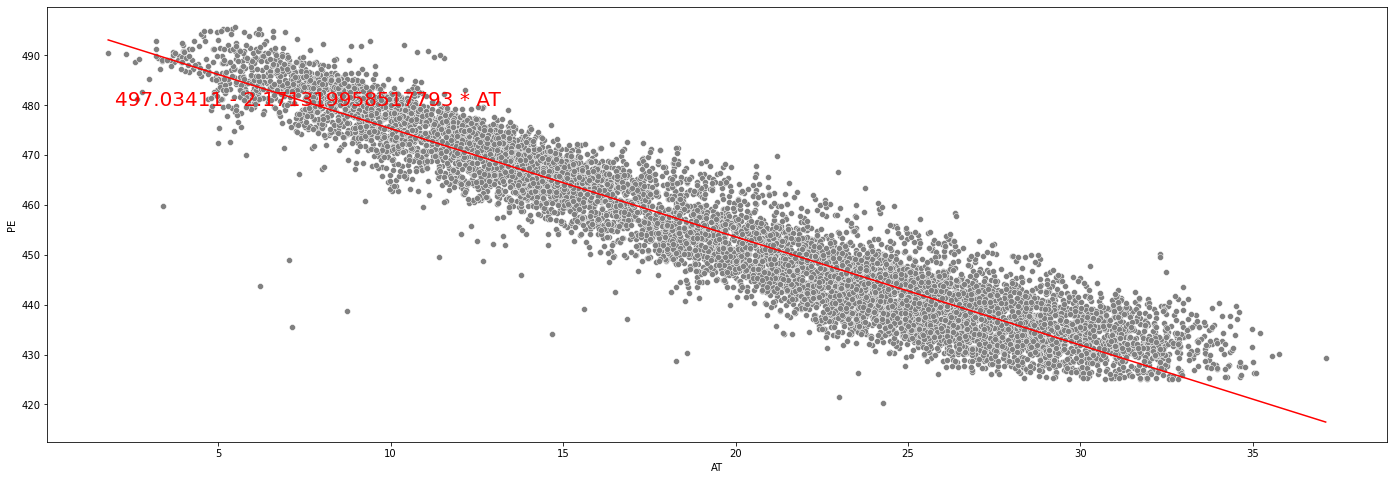

In [37]:
plt.figure(figsize=(24,8))
sns.scatterplot(data["AT"],data["PE"],color="grey")
sns.lineplot(x=temp["AT"],y=temp["predicted"],color="red")
plt.annotate("497.03411 - 2.171319958517793 * AT",(2,480),size=20,color="red")